# HR Analytics : Why Employees Resign?

by - Himanshu Goswami

![Resignation](https://resume.naukri.com/articles/wp-content/uploads/sites/7/2015/08/QuitJob.jpg)

------------------------------------------------------------

In [80]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import squarify

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [82]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Summary of our Data

> #### ***Dataset Structure***

In [83]:
df.shape

(1470, 35)

Our Dataset has 1470 rows (observations) and 35 columns (features).

> #### ***Missing Values***

In [84]:
df.isnull().sum().unique()

array([0], dtype=int64)

There is NO missing value in entire dataset

> #### ***Data Types in dataset***

In [85]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

Only two types of datatypes exist :- Integers and Object (categorical)

> #### ***Output Feature***

In [86]:
df['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

Attrition is our output feature and also our dependent feature. Logistic Regression will be performed using it.

> #### ***Balanced or Imbalanced Dataset***

In [87]:
df.Attrition.value_counts() *100 / df.Attrition.value_counts().sum()

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

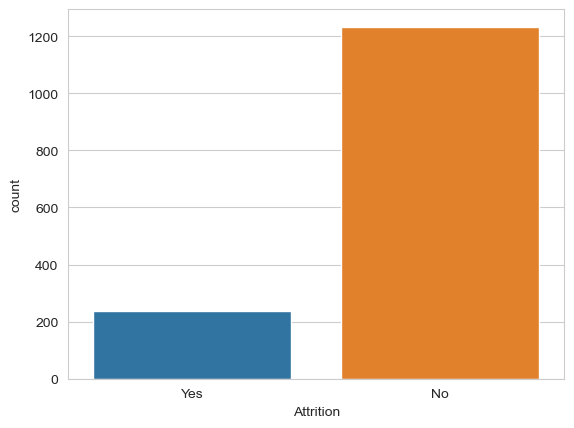

In [88]:
sns.countplot(x=df['Attrition'])

We have an **Imbalanced Dataset** with 84% field are having data of employees who didn't leave the company.
Only a small 16% of people left the company.

![age](https://social.hays.com/wp-content/uploads/2017/09/ThinkstockPhotos-669854210-3.jpg)

## Age Analysis:

In this section, we will try to see how much age has impacted the rate of attrition. We will be doing Bivariate and Multivariate analysis here by matching age with other feature like "Distance from home", "Income" etc to find how much these features together impact the attrition rate.

#### **Summary**:

- **Age** :  The attrition is maximum between the age group of 28-32. After 35 there is fall in attrition rate showing how people looking for job stability. Between 55-60, employees usually don't leave their jobs.
- **Age & Distance From Home** : From the age of 25 to 50 Distance from home impacts the attrition rate. Before 25 Employees generally doesn't leave work maybe of getting new job or willing to struggle at early stage of career.
- **Age & Involvement in Job** : We can clearly see two things here... First, Employees under 25 and over 55 are more involved in Job. Secondly, in all age groups, lower job involvement always had more attrition rate.
- **Age & Monthly Income** : In all age groups, whenever an employee is paid lower than average then there are more chances of attrition. Also there is a decline in income after the age of 55.
- **Age & Job Satisfaction** : At early and last stage of career, there is huge variation in Job Satisfaction, at early stage there are more number of attrition but at last stage of career people generally don't leave job even if it doesn't satisfy them. In mid-age groups low satisfaction does become cause of attrition.
- **Age & Over Time** : Over time at work has become cause of attrition at almost all ages except the last stage.

In [89]:
age_att = df.groupby(['Age', 'Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')

px.line(age_att, x='Age', y='Counts', color='Attrition', title='How much ageing impacts Attrition')

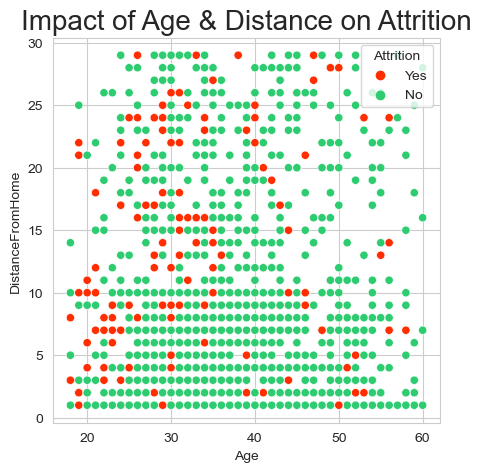

In [90]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Age', y='DistanceFromHome', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Distance on Attrition", fontsize=20)
plt.show();

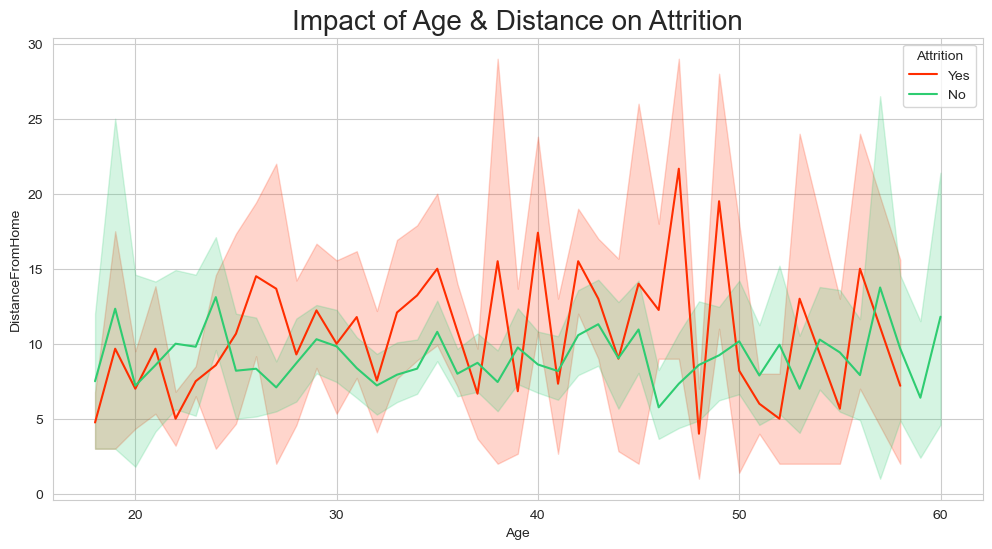

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='DistanceFromHome', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Distance on Attrition", fontsize=20)
plt.show();

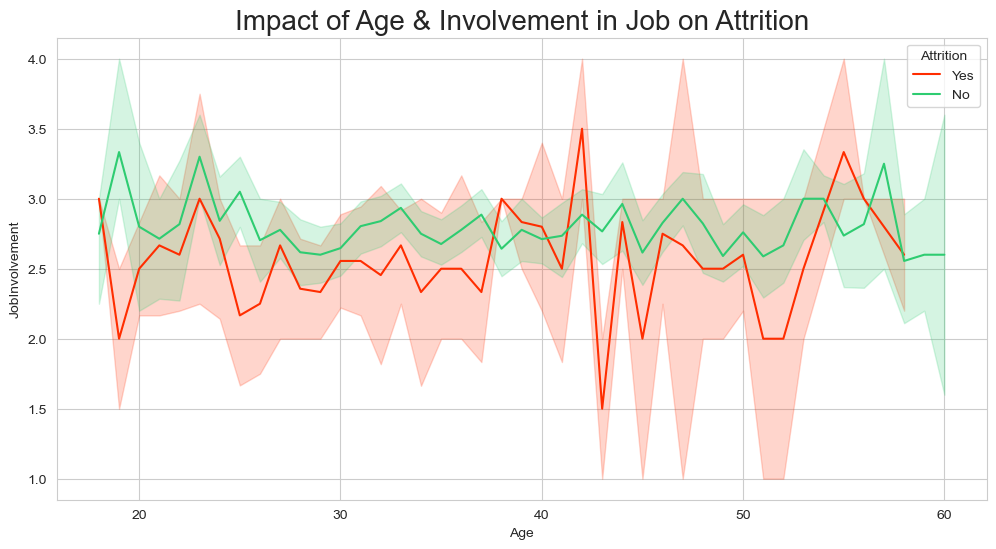

In [92]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='JobInvolvement', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Involvement in Job on Attrition", fontsize=20)
plt.show();

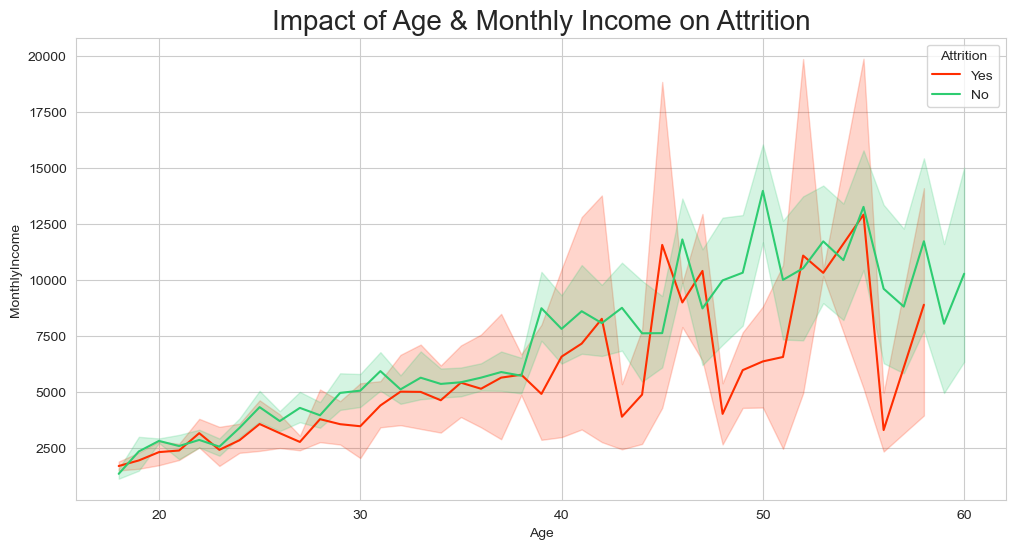

In [93]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='MonthlyIncome', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Monthly Income on Attrition", fontsize=20)
plt.show();

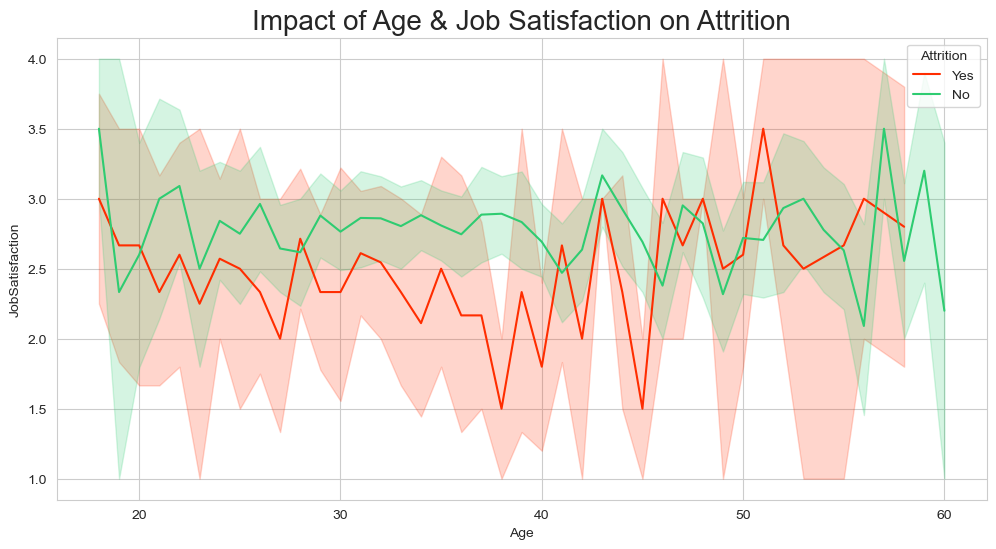

In [94]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='JobSatisfaction', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Job Satisfaction on Attrition", fontsize=20)
plt.show();

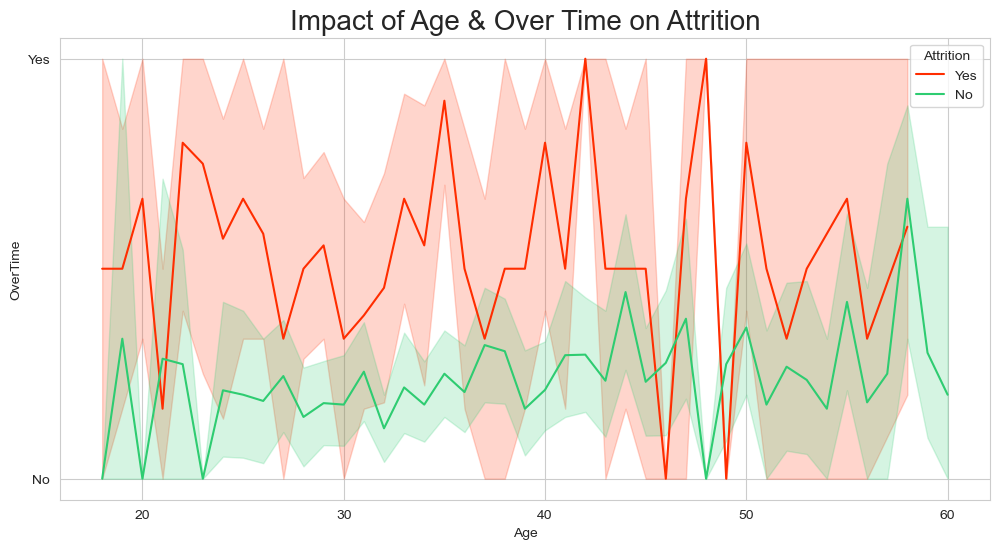

In [95]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='OverTime', data=df, hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title("Impact of Age & Over Time on Attrition", fontsize=20)
plt.show();

![gender](https://enterprisetalk.com/wp-content/uploads/2022/07/Four-Key-Practices-to-Boost-Employee-Engagement-and-Retention-696x398.jpg)

## Gender Analysis:

In this section, we will try to see if there are any discrepancies between male and females in the organization. Also, we will look at other basic information such as the age, level of job satisfaction and average salary by gender.

#### **Summary**:

- **Gender** : In our dataset, we have 60% Male & 40% Females. Out of those **60% male employees, 17% left their organization**. Whereas, out of **40% Females 15% Employees left their organization**. We can say Male are little more likely to leave their jobs.
- **Age by Gender** : The average age of females is 37.33 and for males is 36.65 and both distributions are similar.
- **Salaries** : The average salaries for both genders are practically the same with **males** having an average of 6380.51 and **females** 6686.57.
- **Job Satisfaction** : In case of Females, individuals who didn't leave the organization, job satisfaction levels are practically the same. However in case of Males, they had lower satisfaction level as opposed to Females.

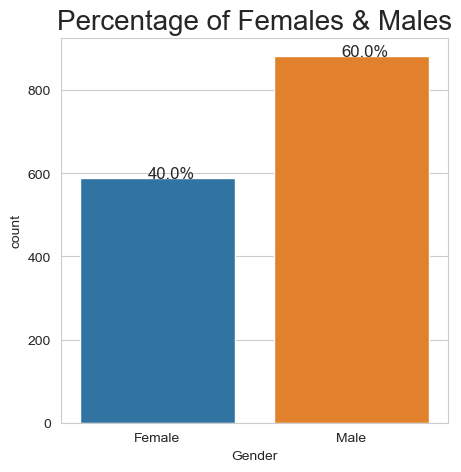

In [96]:
def perc(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x='Gender')
perc(ax,df.Gender)
plt.title('Percentage of Females & Males', fontsize=20)
plt.show();

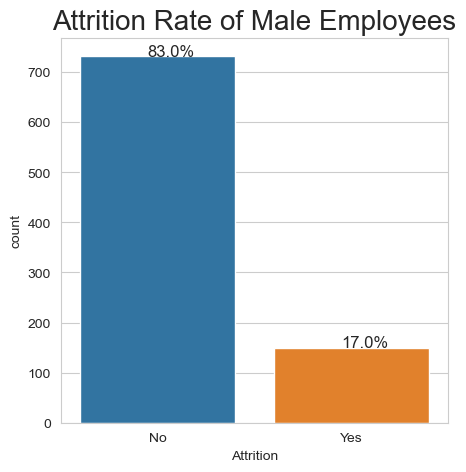

In [97]:
plt.figure(figsize=(5,5))
df_man = df.loc[df['Gender']=='Male']
ax = sns.countplot(data=df_man, x='Attrition')
perc(ax, df_man.Attrition)
plt.title('Attrition Rate of Male Employees', fontsize=20)
plt.show();

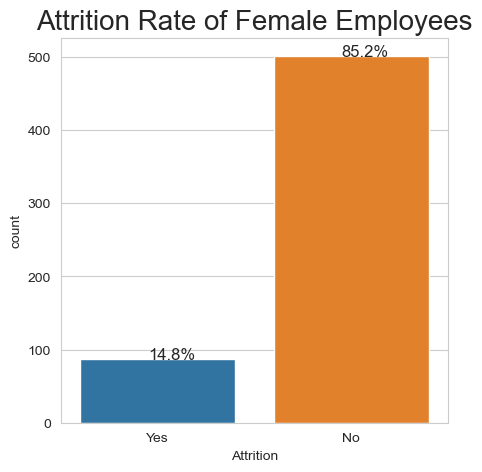

In [98]:
plt.figure(figsize=(5,5))
df_woman = df.loc[df['Gender']=='Female']
ax = sns.countplot(data=df_woman, x='Attrition')
perc(ax, df_woman.Attrition)
plt.title('Attrition Rate of Female Employees', fontsize=20)
plt.show();

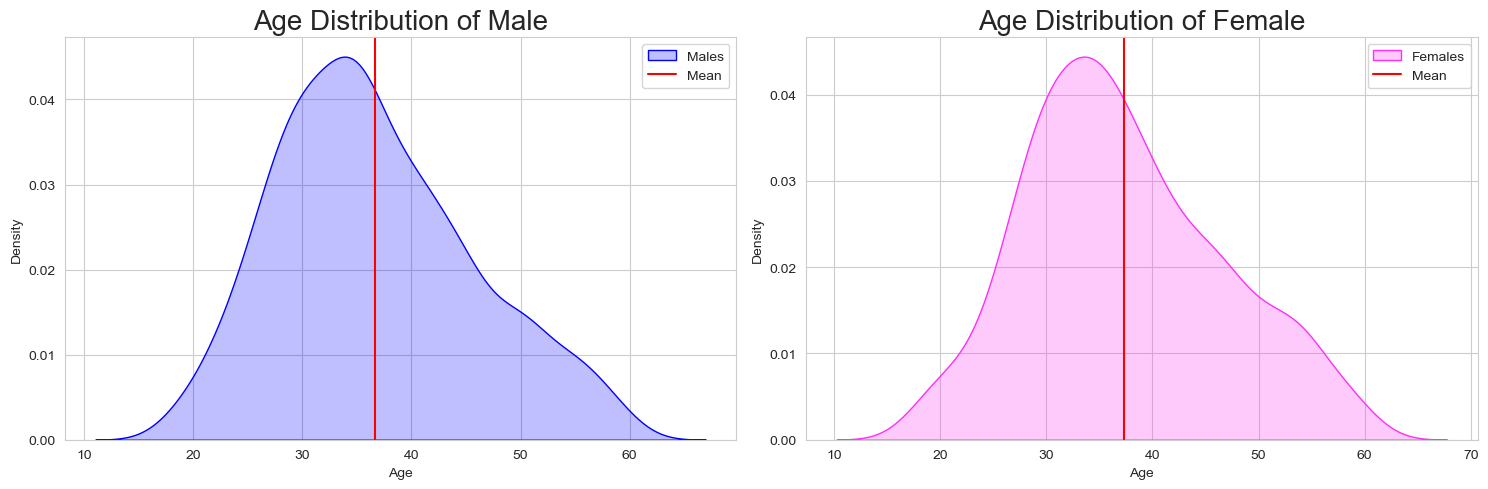

In [99]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df_man, x=df_man['Age'], shade=True, color='b')
plt.axvline(x=df_man['Age'].mean(), color='red', )
plt.title("Age Distribution of Male", fontsize=20)
plt.legend(['Males', 'Mean'])

plt.subplot(1,2,2)
sns.kdeplot(data=df_woman, x=df_woman['Age'], shade=True, color="#FE2EF7")
plt.axvline(x=df_woman['Age'].mean(), color='red', )
plt.title("Age Distribution of Female", fontsize=20)
plt.legend(['Females', 'Mean'])

plt.tight_layout()
plt.show();

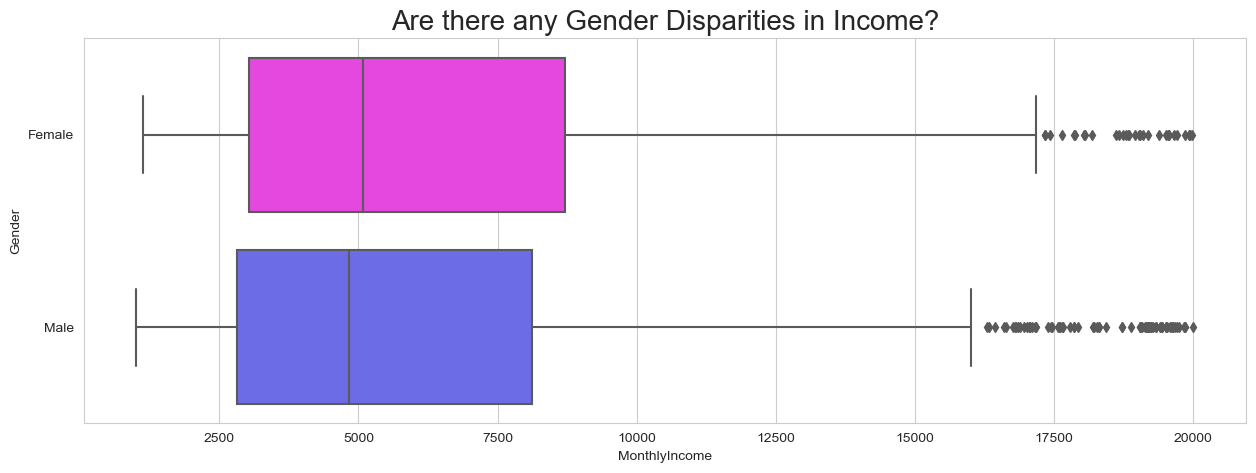

In [100]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='MonthlyIncome', y='Gender', palette=["#FE2EF7", "#5858FA"])
plt.title('Are there any Gender Disparities in Income?', fontsize=20)
plt.show();

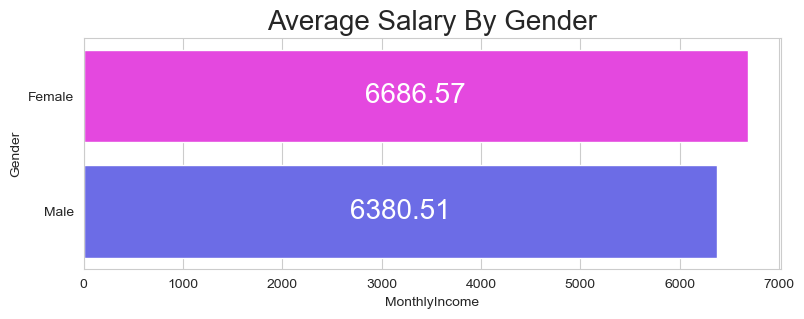

In [101]:
plt.figure(figsize=(9,3))
df_sal = round(df.groupby('Gender')['Gender','MonthlyIncome'].mean(),2)
ax = sns.barplot(data=df_sal,x=df_sal.MonthlyIncome , y=df_sal.index, palette=["#FE2EF7", "#5858FA"])
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=20, color='white')

plt.title('Average Salary By Gender', fontsize=20)
plt.show();

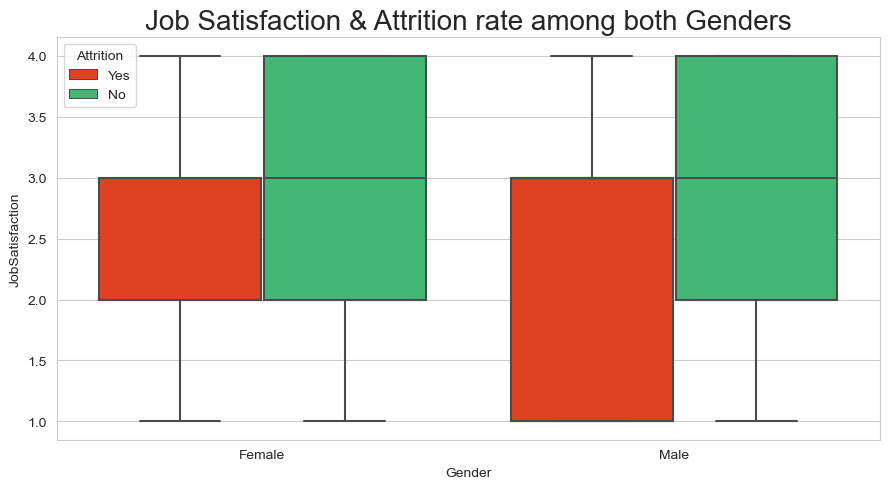

In [102]:
plt.figure(figsize=(9,5))
gender_box = df[['Attrition', 'JobSatisfaction', 'Gender']]
sns.boxplot(data=gender_box, x='Gender', y='JobSatisfaction', hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title('Job Satisfaction & Attrition rate among both Genders', fontsize=20)
plt.tight_layout()
plt.show();

![generation](https://www.glassdoor.com/employers/app/uploads/sites/2/2019/01/GettyImages-960865818.jpg)

## Generations & Education Analysis :

It is well known, that each type of generation have their particular peculiarities which makes it important to explore. It will be interesting to see how each Generation behaves at various parameters.

#### **Summary**:

- **Attrition by Generation** : In all age groups, those employees who have worked in more number of organizations are highly likely to leave current organization. Boomers top the chart when it comes to percentage of them who have quit their companies.
- **Last Promotion** : Older Generations aren't receiving Promotion for quite a long time which is becoming the reason of Attrition. Newer generations get promoted quite early which is why their number of attrition is low.
- **Education Level** : Majority of employees are holding Bachelors Degree
- **Attrition by Level of Education** : Bachelors top the chart in Attrition rate. Those who are Phd Degree holders are least likely to leave the company. Masters Degree employees are also likely to leave the company.

In [103]:
# Creating new feature named Generations categorized on the basis of age.

df['Generations'] = df['Age'].apply(lambda x: 'Gen Z' if x<25 else 'Millenials' if x>=25 and x<= 40 else 'Gen X' if x>=41 and x<=53 else 'Boomers')

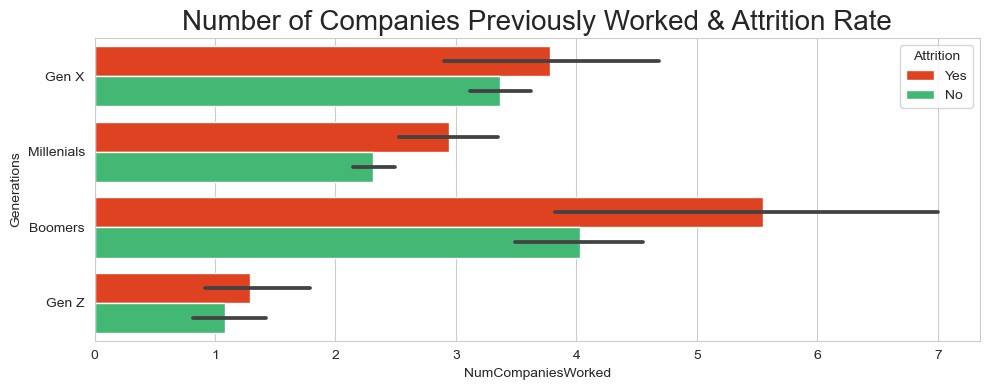

In [104]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='NumCompaniesWorked', y='Generations',hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title('Number of Companies Previously Worked & Attrition Rate',fontsize=20)
plt.tight_layout()
plt.show();

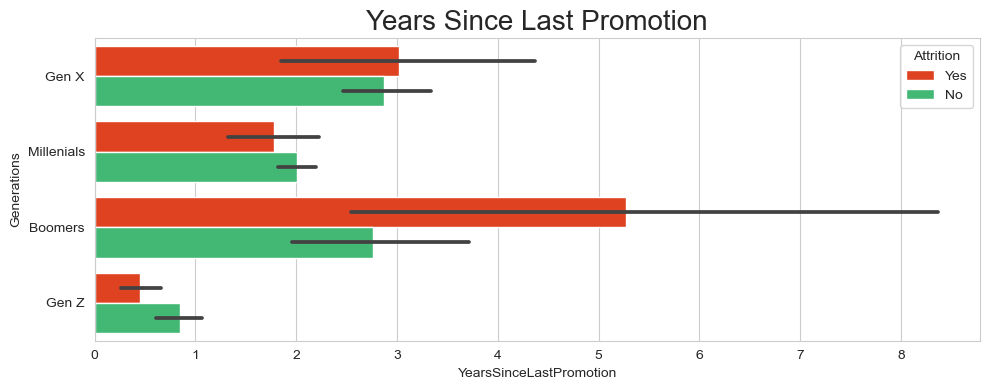

In [105]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='YearsSinceLastPromotion', y='Generations',hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title('Years Since Last Promotion',fontsize=20)
plt.tight_layout()
plt.show();

In [106]:
df['Education_Level'] = df['Education'].apply(lambda x: 'Without College D.' if x==1 else 'College Deg.' if x==2  else 'Bachelors D.' if x==3 else 'Masters Deg.' if x==4 else 'Phd Deg.')

Text(0.5, 1.0, 'Attrition by Level of Education')

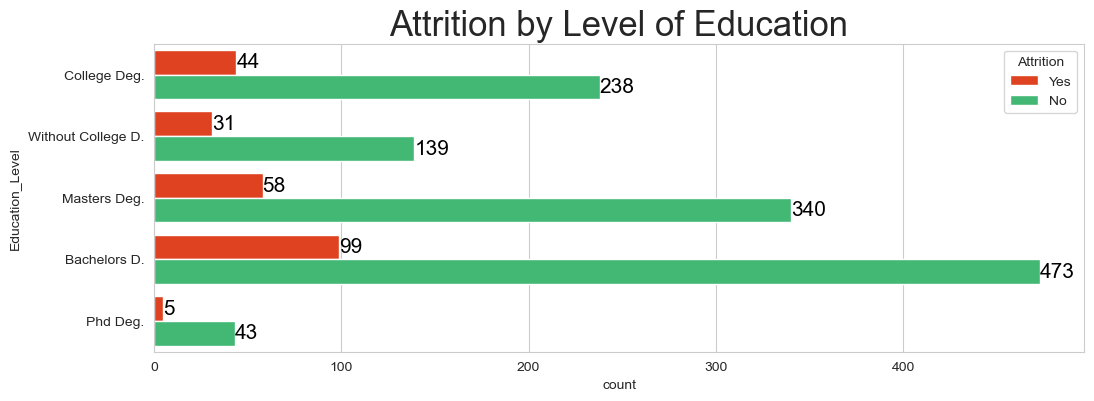

In [107]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, y='Education_Level', hue='Attrition', palette=["#FF2D00",'#2ECC71'])
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=15, color='black')
plt.title("Attrition by Level of Education", fontsize=25)

![env](https://farm5.staticflickr.com/4111/5122450020_6402b53a77_z.jpg)

## Working Environment :

In this section, we will explore everything that is related to the working environment and the structure of the organization.

#### **Summary**:

- **Number of Employees by Job Roles** : Sales and Research Scientist are the job positions with the highest number of employees.
- **Salary by Job Role** : Managers and Research Directors have the highest salary on average.
- **Attrition by Job Roles** : **Sales Executive, Research Scientist and Laboratory Technicians** have the highest attrition rates. This could give us a hint that in these departments we are experiencing certain issues with employees.
- **Attrition by Years with Current Manager** : In early years with current manager, there are chances of attrition. Longer the relationship, lesser the attrition rate
- **Working Environment** : As expected, managers and healthcare representatives are dealing with a lower working environment however, we don't see the same with sales representatives that could be because most sales representatives work outside the organization.

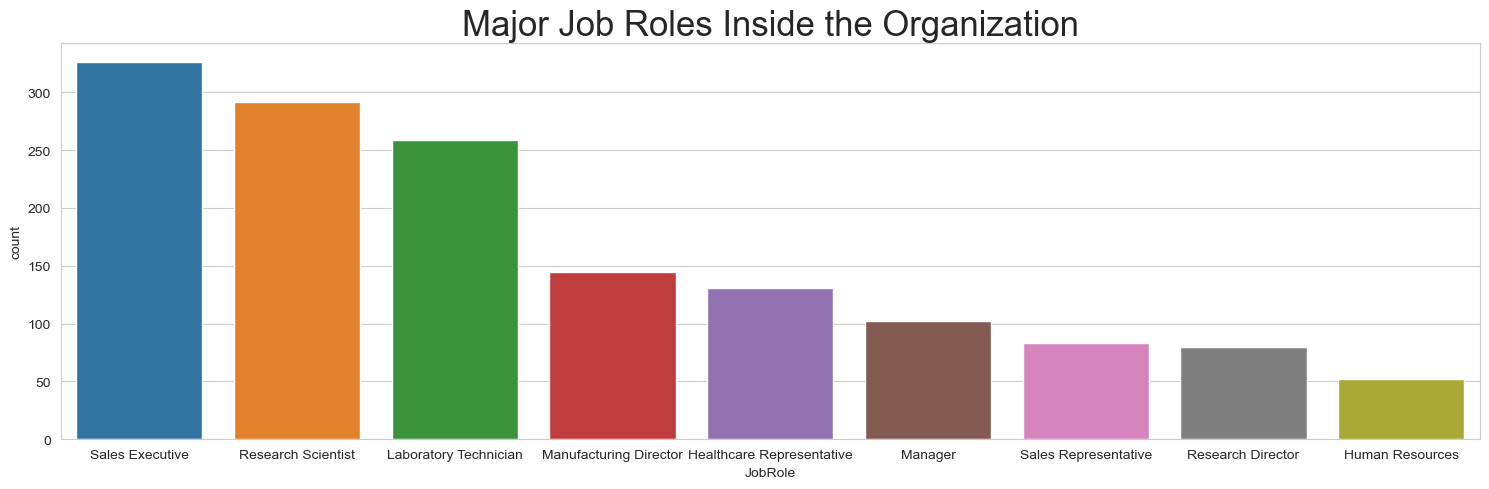

In [108]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='JobRole')
plt.title('Major Job Roles Inside the Organization',fontsize=25)
plt.tight_layout()
plt.show();

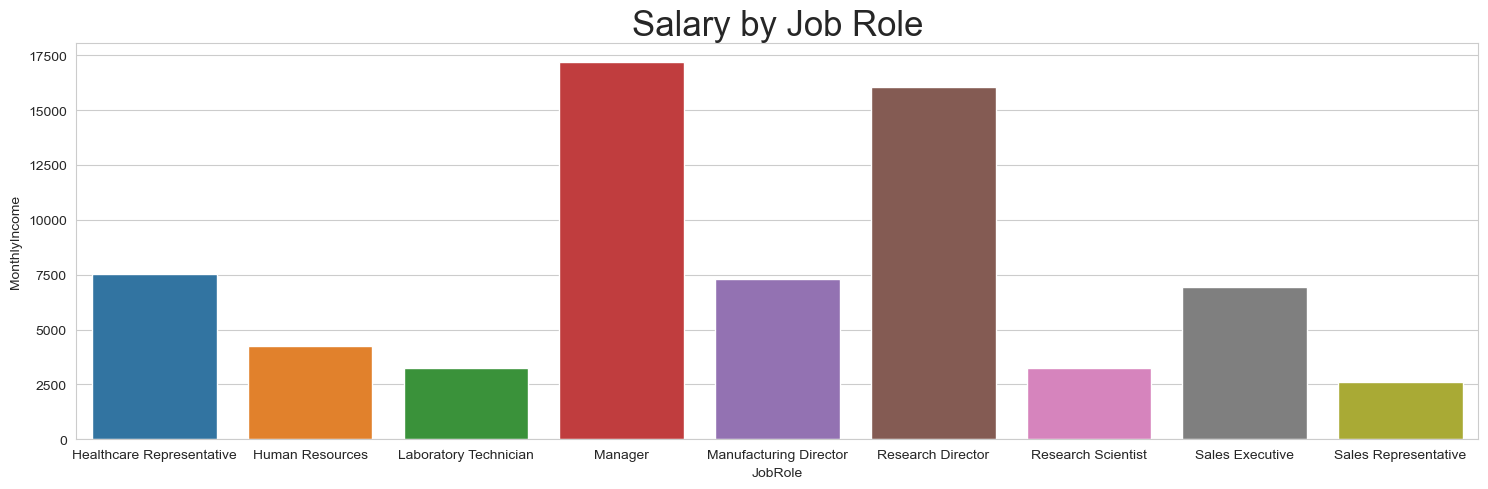

In [109]:
job_inc = round(df.groupby('JobRole')['JobRole', 'MonthlyIncome'].mean(),2)

plt.figure(figsize=(15,5))
sns.barplot(data=job_inc,x=job_inc.index , y=job_inc.MonthlyIncome)
plt.title('Salary by Job Role',fontsize=25)
plt.tight_layout()
plt.show();

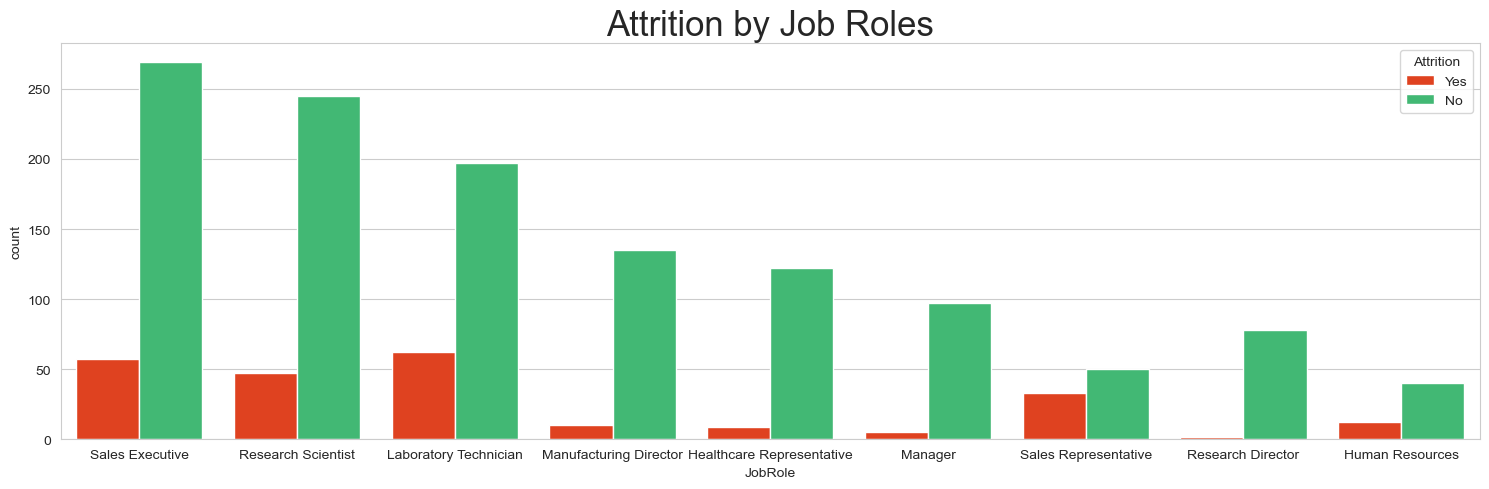

In [110]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='JobRole' ,hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title('Attrition by Job Roles',fontsize=25)
plt.tight_layout()
plt.show();

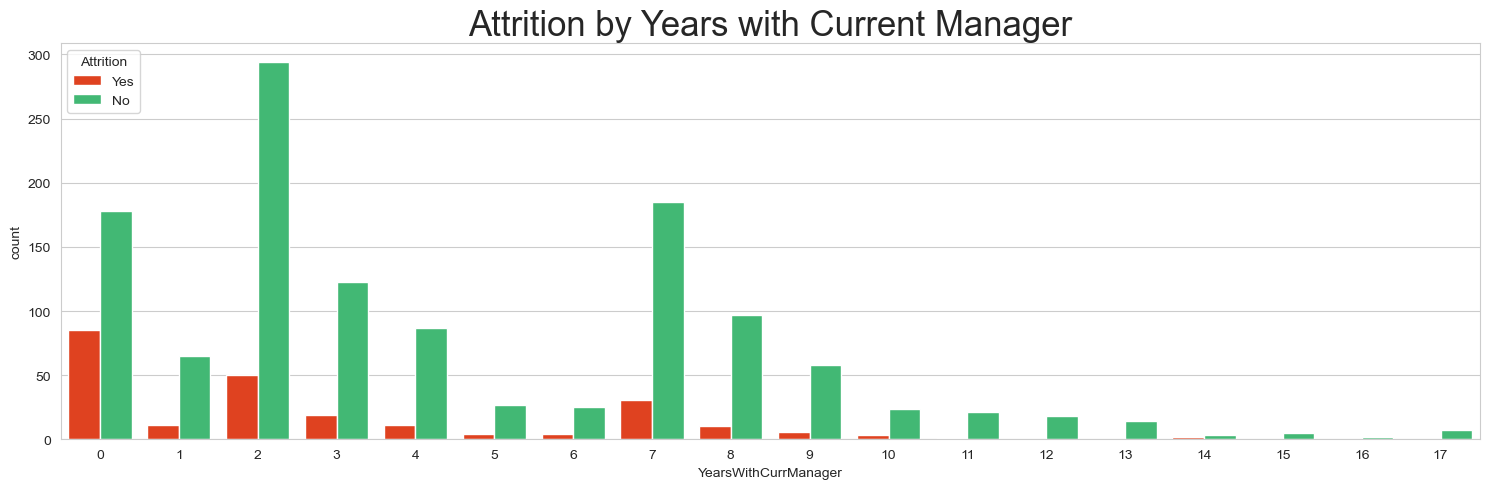

In [111]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='YearsWithCurrManager' ,hue='Attrition', palette=["#FF2D00",'#2ECC71'])
plt.title('Attrition by Years with Current Manager',fontsize=25)
plt.tight_layout()
plt.show();

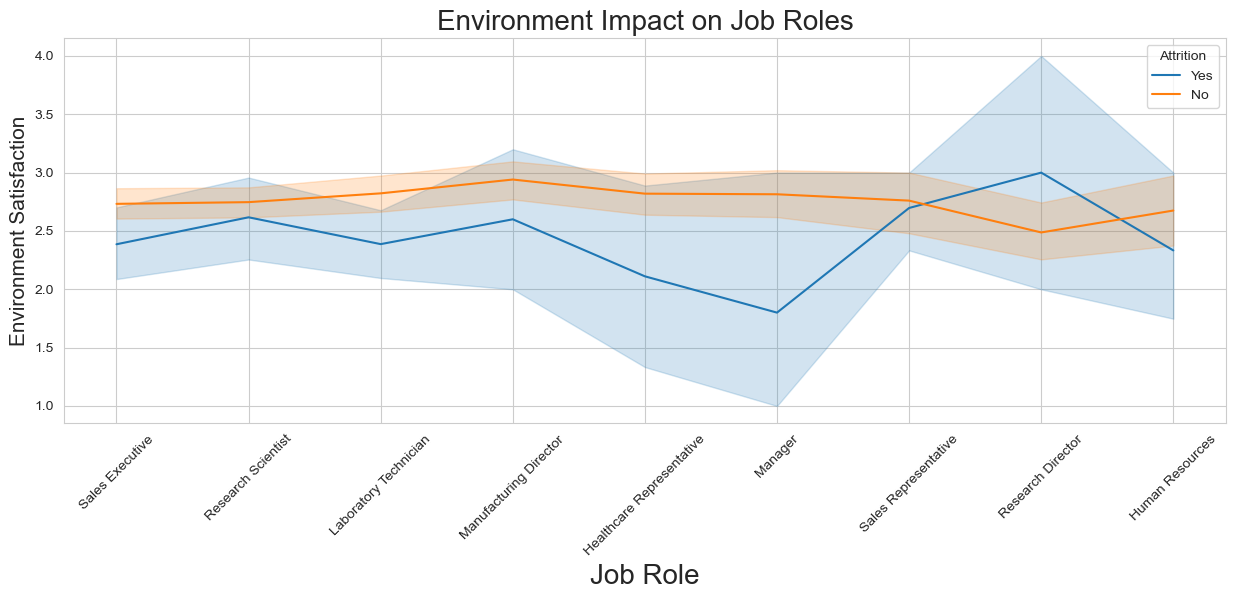

In [112]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='JobRole', y='EnvironmentSatisfaction', hue='Attrition')
plt.xticks(rotation = 45)
plt.xlabel(xlabel='Job Role', fontsize=20)
plt.ylabel(ylabel='Environment Satisfaction', fontsize=15)
plt.title("Environment Impact on Job Roles",fontsize=20)
plt.show();

## Correlation :

<AxesSubplot:>

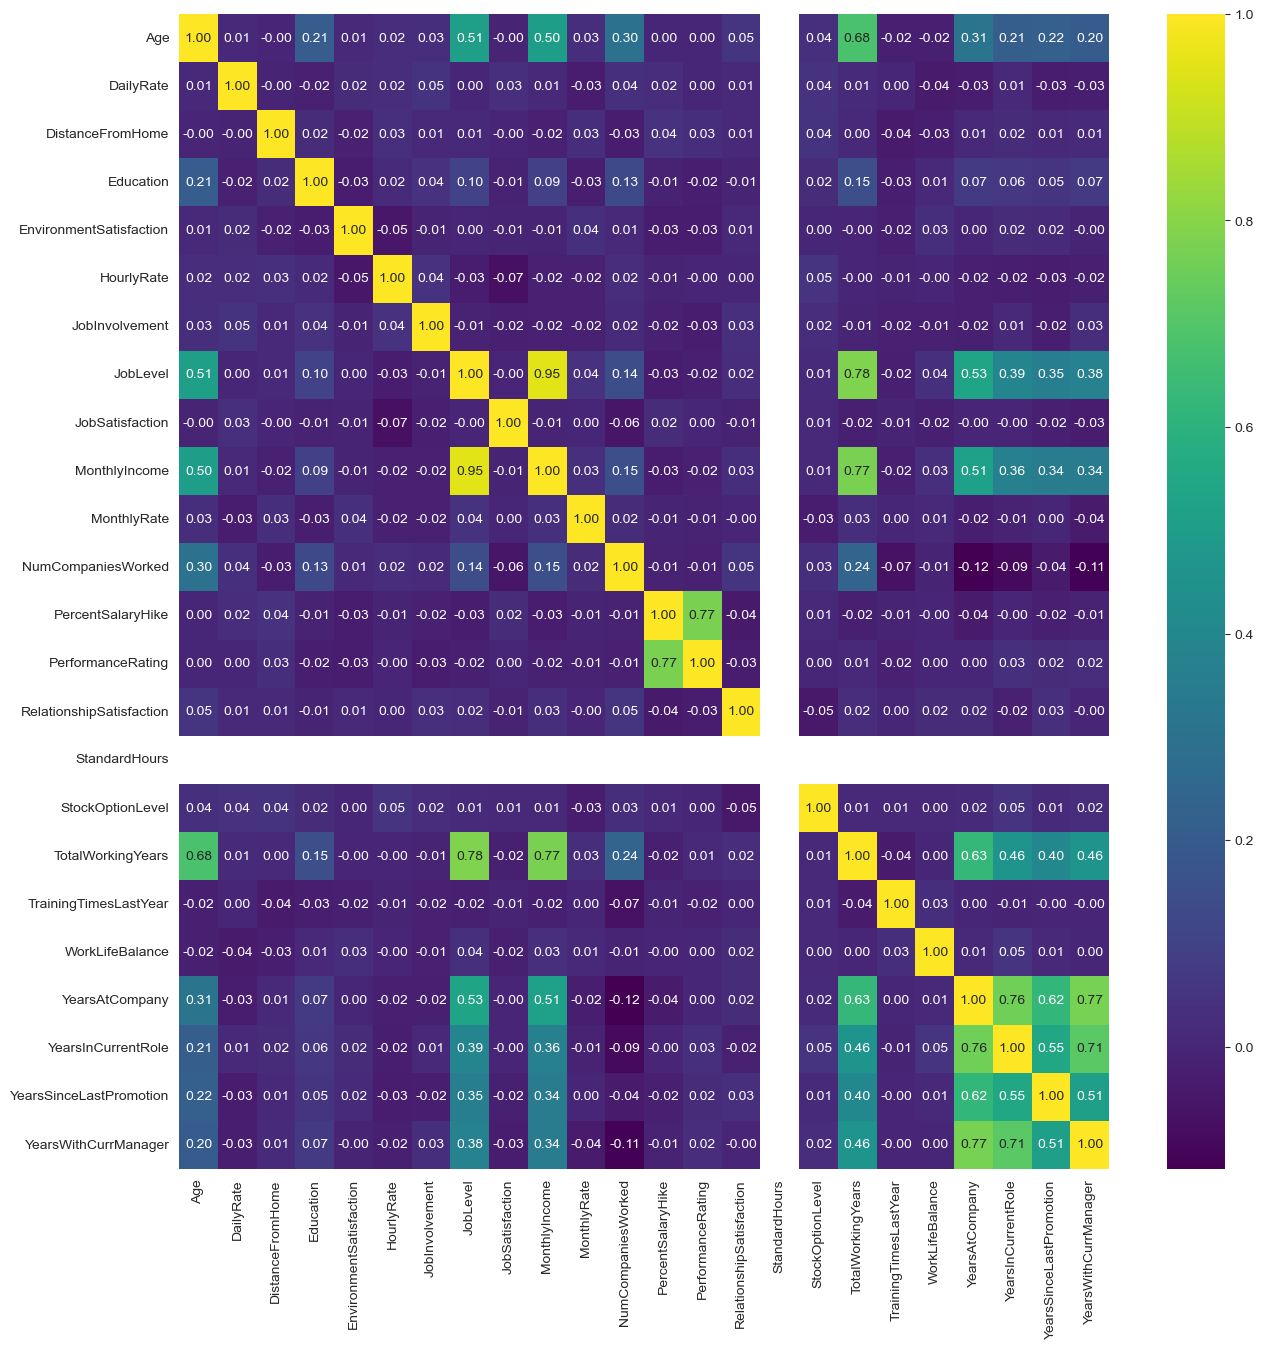

In [113]:
X=df[['Age', 'DailyRate',
        'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager']]
y=df[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

![ML](https://www.freecodecamp.org/news/content/images/2022/08/A6125B75-DB79-4448-94C9-E6ABD3E0E3E9.jpeg)

## Model Training:

Let's try to predict for all the given inputs, how accurately can we we predict wether an employee will be staying in the organization or resigning from it.

Algorithm applied: **Logistic Regression**

In [114]:
X=df[['Age', 'DailyRate',
        'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager']]

y=df[['Attrition']].values.ravel()

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [116]:
# Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:- ",accuracy)

Accuracy:-  0.842391304347826


In [117]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[310,   0],
       [ 58,   0]], dtype=int64)

In [118]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Breaking down the formula for Accuracy (Manual Checking)

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.842391304347826

In [119]:
# Precison

Precision = true_positive/(true_positive+false_positive)
print("Precision:- ",Precision)

Precision:-  1.0


In [120]:
# Recall

Recall = true_positive/(true_positive+false_negative)
print("Recall:- ",Recall)

Recall:-  0.842391304347826


#### Observation 84% accuracy??? Not bad for a start... however, let us find method to improve this further.

#### In the next step, we shall be working to increase the efficiency further.

In [121]:
data_dummies=pd.get_dummies(df)
features=data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
                       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
                       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
                       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
                       'Department_Human Resources', 'Department_Research & Development',
                       'Department_Sales', 'EducationField_Human Resources',
                       'EducationField_Life Sciences', 'EducationField_Marketing',
                       'EducationField_Medical', 'EducationField_Other',
                       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
                       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
                       'JobRole_Laboratory Technician', 'JobRole_Manager',
                       'JobRole_Manufacturing Director', 'JobRole_Research Director',
                       'JobRole_Research Scientist', 'JobRole_Sales Executive',
                       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
                       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
                       'OverTime_No', 'OverTime_Yes']]
X=features.values
y=data_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.891
Test Model accruracy scores: 0.897
--------------------------------------------------------------------------


![90](https://www.pngall.com/wp-content/uploads/13/90-Discount-PNG-Image.png)